# Import Packages

In [0]:
# data cleaning and wrangling tools
import pandas as pd
import ast
import re
import string

# visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pprint import pprint

# nlp tools
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD, NMF
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV

# metrics
from sklearn.metrics import fowlkes_mallows_score

# save files
import pickle

# disable warnings that bring up a deprecation warning
import warnings
warnings.filterwarnings("ignore")

In [0]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d:" % (topic_idx))
        print (" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [0]:
# create function to further clean each ingredient string
def clean_ingredients(ingredient):
    if ingredient != None:
        cleaned = ingredient.lower()
        cleaned = ingredient.replace("uncategorized", "")
        
        parsed = re.sub("(\d?)", "", cleaned)
        return parsed

In [0]:
# define function to pick model after it is fit
def pickle_model(model_name, model):
    model_pickle_path = './foodnetwork_{}.pkl'.format(model_name)
    model_pickle = open(model_pickle_path, 'wb')
    pickle.dump(model, model_pickle)
    model_pickle.close()

# Import Data

In [0]:
# read in pickled data for topic modeling ingredients
ingredients_grouped = pd.read_pickle("foodnetwork_ingred_grp_sklearn.pkl")

In [6]:
ingredients_grouped.head()

,ingredients,ingredient_parsed
recipe_id,,
1,"1 loaf French bread (13 to 16 ounces), 8 large...",french_bread eggs half_half milk granulated_su...
2,"1 (14-ounce) can sweetened condensed milk, 1 (...",sweetened_condensed_milk frozen_whipped_toppin...
3,"1 (18 1/4-ounce) package yellow cake mix, 1 eg...",yellow_cake_mix egg butter_melted cream_cheese...
4,"1 (15 1/4-ounce) can whole kernel corn, draine...",whole_kernel_corn_drained cream_style_corn cor...
5,"4 skinless chicken breast halves, with ribs, 2...",skinles_chicken_breast_ribs skinles_chicken_th...


In [7]:
ingredients_grouped.shape

(6652, 2)

In [8]:
ingredients_grouped.isnull().sum()

ingredients          0
ingredient_parsed    0
dtype: int64

# Grid Search with Latent Dirichlet Allocation (LDA) using Scikit-Learn

## Grid Search with LDA to Find Best Parameters

In [0]:
# read in model pickle of sklearn lda model
tf_pickle = open('./foodnetwork_tf_sklearn.pkl', 'rb')
tf = pickle.load(tf_pickle)

In [0]:
# Define Search Parameters
search_params = {'n_components': [10, 15, 20, 25, 30, 40, 50, 60, 70], 'learning_decay': [.5, .7, .9]}

In [0]:
# Init the Model
lda = LatentDirichletAllocation(random_state=42)

In [0]:
# Init Grid Search Class
lda_model = GridSearchCV(lda, param_grid=search_params, cv=5, verbose=10)

In [13]:
# Do the Grid Search
lda_gs = lda_model.fit(tf)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] learning_decay=0.5, n_components=10 .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_decay=0.5, n_components=10, score=-71761.287, total=   7.9s
[CV] learning_decay=0.5, n_components=10 .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.9s remaining:    0.0s


[CV]  learning_decay=0.5, n_components=10, score=-71532.058, total=   7.5s
[CV] learning_decay=0.5, n_components=10 .............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   15.4s remaining:    0.0s


[CV]  learning_decay=0.5, n_components=10, score=-70319.609, total=   7.6s
[CV] learning_decay=0.5, n_components=10 .............................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   22.9s remaining:    0.0s


[CV]  learning_decay=0.5, n_components=10, score=-68084.639, total=   7.4s
[CV] learning_decay=0.5, n_components=10 .............................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   30.3s remaining:    0.0s


[CV]  learning_decay=0.5, n_components=10, score=-73453.599, total=   7.3s
[CV] learning_decay=0.5, n_components=15 .............................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   37.6s remaining:    0.0s


[CV]  learning_decay=0.5, n_components=15, score=-74020.290, total=   7.4s
[CV] learning_decay=0.5, n_components=15 .............................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   44.9s remaining:    0.0s


[CV]  learning_decay=0.5, n_components=15, score=-74175.959, total=   7.3s
[CV] learning_decay=0.5, n_components=15 .............................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   52.2s remaining:    0.0s


[CV]  learning_decay=0.5, n_components=15, score=-72763.236, total=   7.5s
[CV] learning_decay=0.5, n_components=15 .............................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   59.7s remaining:    0.0s


[CV]  learning_decay=0.5, n_components=15, score=-71023.665, total=   7.4s
[CV] learning_decay=0.5, n_components=15 .............................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.1min remaining:    0.0s


[CV]  learning_decay=0.5, n_components=15, score=-76274.528, total=   7.3s
[CV] learning_decay=0.5, n_components=20 .............................
[CV]  learning_decay=0.5, n_components=20, score=-75886.819, total=   7.4s
[CV] learning_decay=0.5, n_components=20 .............................
[CV]  learning_decay=0.5, n_components=20, score=-76374.533, total=   7.4s
[CV] learning_decay=0.5, n_components=20 .............................
[CV]  learning_decay=0.5, n_components=20, score=-74765.265, total=   7.4s
[CV] learning_decay=0.5, n_components=20 .............................
[CV]  learning_decay=0.5, n_components=20, score=-72895.062, total=   7.6s
[CV] learning_decay=0.5, n_components=20 .............................
[CV]  learning_decay=0.5, n_components=20, score=-77873.499, total=   7.4s
[CV] learning_decay=0.5, n_components=25 .............................
[CV]  learning_decay=0.5, n_components=25, score=-77772.961, total=   7.4s
[CV] learning_decay=0.5, n_components=25 ........

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed: 17.6min finished


In [0]:
# Best Model
best_lda_model = lda_model.best_estimator_

In [16]:
best_lda_model

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.5,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [0]:
# # Pickle Best Model
# pickle_model("tf_sklearn_best3", best_lda_model)

In [18]:
# Model Parameters
print("Best LDA Model's Params: ", lda_model.best_params_)

Best LDA Model's Params:  {'learning_decay': 0.5, 'n_components': 10}


In [19]:
# Log Likelihood Score
print("Best Log Likelihood Score: ", lda_model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(tf))

Best Log Likelihood Score:  -71030.42379859771
Model Perplexity:  342.9772956227425


In [20]:
lda_model.cv_results_

{'mean_fit_time': array([7.34541426, 7.19487004, 7.2599658 , 7.26260099, 7.48749342,
        7.59205909, 7.92253528, 8.12841167, 8.46536627, 7.26536713,
        7.21298375, 7.25715508, 7.38709068, 7.42040405, 7.62609138,
        7.92831445, 8.19450736, 8.4564321 , 7.24457202, 7.30030484,
        7.27159157, 7.35981574, 7.41551685, 7.67514224, 7.87382665,
        8.28672252, 8.4331243 ]),
 'mean_score_time': array([0.16877322, 0.17362537, 0.17771144, 0.18396468, 0.18315811,
        0.18237038, 0.19198165, 0.19448032, 0.19869037, 0.17052517,
        0.17409716, 0.17809787, 0.18020539, 0.18006639, 0.1866931 ,
        0.19289608, 0.19706845, 0.19737511, 0.16985087, 0.17605414,
        0.17626076, 0.18106089, 0.18144832, 0.18548512, 0.18660264,
        0.19583015, 0.19609928]),
 'mean_test_score': array([-71030.4237986 , -73651.66979303, -75559.20747601, -77329.26014227,
        -78566.54517708, -80952.89504224, -82911.57863594, -84445.17174952,
        -85606.90677272, -71030.4237986 , -73

In [0]:
plt.figure(figsize=(15,8))
plt.plot(x=lda_model.cv_results_['param_n_components'], y=lda_model.cv_results_['mean_test_score'])
plt.show()

In [23]:
len(lda_model.cv_results_["params"])

27

In [24]:
len(lda_model.cv_results_["mean_test_score"])

27

## Analysis of the Results

In [25]:
# Create Document - Topic Matrix
lda_output = best_lda_model.transform(tf)

# column names
topicnames = ["Topic" + str(i+1) for i in range(best_lda_model.n_components)]

# index names
docnames = ["Recipe_" + str(i+1) for i in range(len(ingredients_grouped))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,dominant_topic
Recipe_1,0.01,0.01,0.01,0.01,0.01,0.01,0.94,0.01,0.01,0.01,6
Recipe_2,0.02,0.02,0.02,0.02,0.02,0.02,0.82,0.02,0.02,0.02,6
Recipe_3,0.01,0.01,0.01,0.01,0.01,0.01,0.91,0.01,0.01,0.01,6
Recipe_4,0.03,0.03,0.03,0.03,0.41,0.03,0.39,0.03,0.03,0.03,4
Recipe_5,0.01,0.55,0.01,0.39,0.01,0.01,0.01,0.01,0.01,0.01,1
Recipe_6,0.01,0.01,0.01,0.01,0.22,0.27,0.01,0.43,0.01,0.01,7
Recipe_7,0.01,0.01,0.01,0.11,0.01,0.01,0.82,0.01,0.01,0.01,6
Recipe_8,0.01,0.01,0.01,0.65,0.01,0.01,0.28,0.01,0.01,0.01,3
Recipe_9,0.01,0.01,0.01,0.01,0.48,0.01,0.01,0.44,0.01,0.01,4
Recipe_10,0.01,0.01,0.01,0.01,0.01,0.01,0.91,0.01,0.01,0.01,6


In [26]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

,Topic Num,Num Documents
0,8,889
1,3,849
2,6,796
3,1,775
4,0,636
5,4,608
6,7,603
7,5,537
8,2,499
9,9,460


In [0]:
# pyLDAvis.enable_notebook()
# panel = pyLDAvis.sklearn.prepare(best_lda_model, data_vectorized, vectorizer, mds='tsne')
# panel

In [0]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(best_lda_model.components_)

In [28]:
df_topic_keywords.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,0.100015,10.953204,0.100005,6.100006,0.100000,12.358042,0.100005,4.107270,0.100002,0.100024,0.100005,8.766586,3.131642,10.972284,0.100000,27.252942,0.100003,3.499970,8.013442,0.103624,0.100010,0.100003,0.100000,0.100006,2.943953,0.100000,0.100000,0.100003,0.100034,0.100008,0.100044,22.519360,0.100011,0.100023,0.100005,0.100003,0.100003,30.721061,0.100001,0.100023,...,9.747569,0.100000,0.100020,5.567550,0.100000,0.100000,0.100001,3.140352,19.935688,0.100037,0.100000,0.100014,0.100002,0.100002,0.100000,0.100000,0.100006,2.187048,0.100003,0.100034,0.100005,0.100001,0.100001,0.100002,38.753906,9.099993,0.100004,0.605350,0.100001,3.121416,0.100008,0.848782,0.100005,0.100000,0.100015,0.100016,2.763633,0.100000,0.100015,5.760176
1,0.100001,0.100002,0.100004,0.100015,0.100000,0.100000,0.100007,0.100077,0.100007,1.630239,0.100000,0.318420,0.100001,0.100013,0.100002,33.041099,0.100010,0.100021,0.100019,9.866763,16.996104,0.100002,0.100000,8.414389,0.100003,0.100000,0.100000,0.100002,0.100002,14.346851,5.206971,4.147490,0.168833,0.100006,0.100000,0.100006,0.100005,22.911395,0.100000,1.370811,...,0.100004,0.100008,0.100000,18.843133,0.100000,0.100000,1.201460,0.100010,18.548293,15.401270,0.100001,0.100003,0.100002,0.100003,0.100002,0.100019,0.100000,0.100001,0.343365,0.100000,0.100006,0.100004,0.100004,0.100006,17.871161,0.100001,12.099955,0.100012,0.100003,0.100001,40.211115,2.275747,0.100009,4.099978,0.100004,3.498341,0.100002,0.100000,5.489139,4.439782
2,0.100006,0.100001,0.100014,0.100019,0.100003,0.100008,0.100003,0.100000,0.100004,0.100004,0.100000,0.100011,0.100018,0.100005,0.100001,4.101087,0.100001,0.100015,0.100006,0.100018,3.188638,0.100036,0.104776,0.100016,11.235201,0.100000,0.100000,2.089877,0.100001,11.427739,0.100003,0.100007,0.100015,1.108272,1.099895,0.107082,0.100003,0.100005,0.100026,0.100006,...,11.800205,11.910409,2.099997,0.100011,13.099986,1.691345,0.100018,0.124713,0.100013,0.100012,0.100000,0.100010,0.100004,0.100003,0.100013,0.100006,0.100038,0.100000,0.100003,0.100000,0.100000,5.925577,10.265112,0.100007,0.100008,0.100000,0.100011,0.100000,0.100000,0.100000,0.100017,0.100024,0.100001,0.100001,0.100002,0.100034,0.100000,0.100000,0.100000,0.100000
3,0.100014,0.199457,0.100005,0.100012,0.100000,0.100007,0.100011,0.100006,0.100005,0.100018,4.489426,0.100019,0.100003,10.227657,0.100000,121.377952,0.100013,12.517290,6.730047,15.968153,7.083191,0.100002,0.100000,11.404029,1.124827,7.368056,0.100001,0.100001,9.099937,0.100042,9.345481,0.100018,3.659765,17.091666,0.100022,0.100001,0.100000,46.677708,0.100002,0.100000,...,0.100035,0.100001,0.100013,0.100008,0.100001,0.100000,0.100000,0.133070,48.613751,14.531715,0.100003,0.755016,0.100003,0.100000,0.100000,0.100073,1.109687,16.770626,31.047006,0.100002,7.100021,0.100019,0.100004,0.578743,0.100019,0.100001,0.100004,0.100000,0.100012,0.100005,43.309134,3.723852,0.100026,0.100024,0.100008,0.100010,7.397579,0.100000,22.458595,0.100001
4,0.100005,9.147329,128.807272,0.100105,0.100000,0.100002,0.100004,54.092629,29.552913,0.100013,2.437743,61.406234,11.068249,0.100001,0.100003,14.966390,0.100009,0.100038,0.100021,0.894824,0.100002,8.243769,0.100001,0.100006,1.095959,0.100000,0.100014,20.260255,0.100005,0.100002,0.100004,0.100019,0.100005,0.100000,0.100001,0.100003,0.100003,0.100017,0.100004,0.100000,...,0.100014,0.100004,0.100000,1.337544,0.100004,0.100020,0.100028,18.610234,0.100012,27.978900,0.100004,9.841801,0.100004,4.310520,0.100011,0.100000,0.100004,1.342283,0.100005,0.100000,0.100005,3.882245,0.100006,0.100007,57.436624,0.100000,0.100015,0.100000,0.254042,18.071095,0.100621,9.631393,0.100001,0.100006,0.100004,0.100006,0.100041,10.099971,0.100011,0.100001


In [0]:
# define number of max features
no_features = 1000

# define documents to vectorize
documents = ingredients_grouped.ingredient_parsed

# Instantiate vectorizer
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()

In [30]:
# Assign Column and Index
df_topic_keywords.columns = tf_feature_names
df_topic_keywords.index = topicnames

# Styling
def color_red(val):
    color = 'red' if val > 1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold_red(val):
    weight = 700 if val > 1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# View
df_topic_keywords = df_topic_keywords.style.applymap(color_red).applymap(make_bold_red)
df_topic_keywords

In [31]:
# Show top n keywords for each topic
def show_topics(vectorizer, lda_model, n_words=20):
      keywords = np.array(vectorizer.get_feature_names())
      topic_keywords = []
      for topic_weights in lda_model.components_:
          top_keyword_locs = (-topic_weights).argsort()[:n_words]
          topic_keywords.append(keywords.take(top_keyword_locs))
      return topic_keywords

topic_keywords = show_topics(vectorizer=tf_vectorizer, lda_model=best_lda_model, n_words=15)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,pepper,olive,garlic,dijon_mustard,red_wine_vinegar,honey,butter,parsley,lemon_juice,mayonnaise,chicken_stock,sugar,garlic_finely,scallion,sherry_vinegar
Topic 1,olive,black_pepper,garlic,dried_oregano,cumin,onion,crushed_red_pepper_flakes,tomato_paste,pepper,red_bell_pepper,spanish_onion,red_onion,clove_garlic,onion_diced,fresh_lemon_juice
Topic 2,sugar,fish_sauce,soy_sauce,mirin,brown_sugar,garlic,rice_wine_vinegar,orange_juice,fresh_lime_juice,lime_juice,coconut_milk,canola,sake,ice,ginger
Topic 3,black_pepper,olive,unsalted_butter,heavy_cream,garlic,purpose_flour,butter,arlic_clove,shallot,fresh_flat_leaf_parsley,dry_white_wine,fresh_thyme_leaves,grated_parmesan,fresh_thyme,chicken_stock
Topic 4,black_pepper,canola,honey,allspice,garlic,fresh_cilantro_leaves,cinnamon,ketchup,cumin,light_brown_sugar,red_wine_vinegar,chili_powder,lime_juiced,olive,juice_lime
Topic 5,garlic,black_pepper_taste,canola,onion,butter,vegetable,cumin_seeds,black_pepper,ginger,chicken_stock,turmeric,bay_leaves,tomato_paste,black_peppercorns,taste
Topic 6,sugar,purpose_flour,eggs,milk,unsalted_butter,cinnamon,baking_powder,vanilla_extract,butter,granulated_sugar,heavy_cream,flour,egg,baking_soda,whole_milk
Topic 7,black_pepper,olive,grated_parmesan,garlic_powder,garlic,mayonnaise,purpose_flour,eggs,cayenne_pepper,fresh_basil_leaves,butter,paprika,fresh_parsley_leaves,dried_thyme,onion
Topic 8,soy_sauce,garlic,sugar,sesame,vegetable,cornstarch,peanut,rice_vinegar,rice_wine_vinegar,scallion,honey,ginger,toasted_sesame,hoisin_sauce,black_pepper
Topic 9,cumin,olive,coriander,pepper,turmeric,garlic,vegetable,black_pepper,plain_yogurt,garam_masala,red_onion,cinnamon,cayenne_pepper,lemon_juiced,fresh_lemon_juice


## Clustering Documents with Similar Topics and Visualization

In [32]:
# Construct the k-means clusters
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters=15, random_state=100).fit_predict(lda_output)

# Build the Singular Value Decomposition(SVD) model
svd_model = TruncatedSVD(n_components=2)  # 2 components
lda_output_svd = svd_model.fit_transform(lda_output)

# X and Y axes of the plot using SVD decomposition
x = lda_output_svd[:, 0]
y = lda_output_svd[:, 1]

# Weights for the 15 columns of lda_output, for each component
print("Component's weights: \n", np.round(svd_model.components_, 2))

# Percentage of total information in 'lda_output' explained by the two components
print("Perc of Variance Explained: \n", np.round(svd_model.explained_variance_ratio_, 2))

Component's weights: 
 [[ 0.24  0.35  0.23  0.43  0.27  0.24  0.41  0.25  0.42  0.2 ]
 [-0.04 -0.23  0.11 -0.55  0.02  0.05 -0.04 -0.09  0.78 -0.  ]]
Perc of Variance Explained: 
 [0.01 0.16]


Text(0.5, 1.0, 'Segregation of Topic Clusters')

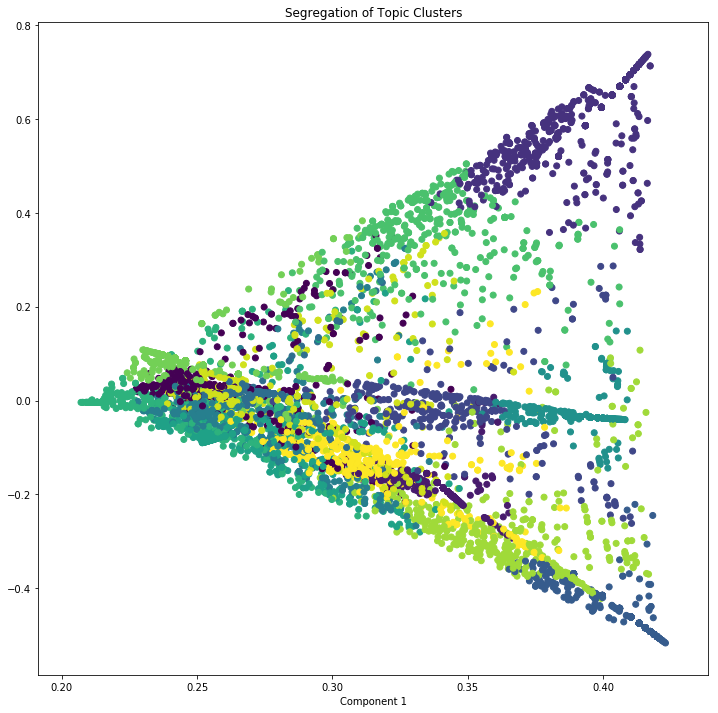

In [33]:
# Plot
plt.figure(figsize=(12, 12))
plt.scatter(x, y, c=clusters)
plt.xlabel('Component 2')
plt.xlabel('Component 1')
plt.title("Segregation of Topic Clusters", )

# Obtaining Similar Documents For Any Given Piece of Text

In [0]:
# from sklearn.metrics.pairwise import euclidean_distances

# nlp = spacy.load('en', disable=['parser', 'ner'])

# # create function that runs raw text through pipeline for predictions
# def predict_topic(text, nlp=nlp):
#     global sent_to_words
#     global lemmatization

#     # Step 1: Clean with simple_preprocess
#     mytext_2 = list(sent_to_words(text))

#     # Step 2: Lemmatize
#     mytext_3 = lemmatization(mytext_2, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

#     # Step 3: Vectorize transform
#     mytext_4 = vectorizer.transform(mytext_3)

#     # Step 4: LDA Transform
#     topic_probability_scores = best_lda_model.transform(mytext_4)
#     topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores), :].values.tolist()
#     return topic, topic_probability_scores

# def similar_documents(text, doc_topic_probs, documents, nlp=nlp, top_n=5, verbose=False):
#     topic, x  = predict_topic(text)
#     dists = euclidean_distances(x.reshape(1, -1), doc_topic_probs)[0]
#     doc_ids = np.argsort(dists)[:top_n]
#     if verbose:        
#         print("Topic KeyWords: ", topic)
#         print("Topic Prob Scores of text: ", np.round(x, 1))
#         print("Most Similar Doc's Probs:  ", np.round(doc_topic_probs[doc_ids], 1))
#     return doc_ids, np.take(documents, doc_ids)

In [0]:
ingredients_grouped.head()

In [0]:
ingredients_grouped.ingredients[1]

In [0]:
# # Get similar documents
# mytext = ingredients_grouped.ingredients[1].split(", ")
# doc_ids, docs = similar_documents(text=mytext, doc_topic_probs=lda_output, documents = ingredients_grouped.ingredients, top_n=1, verbose=True)
# print('\n', docs[0][:500])